

**Instructions:**
* go through the notebook and complete the **tasks** .  
* Make sure you understand the examples given
* When a question allows a free-form answer (e.g., ``what do you observe?``) create a new markdown cell below and answer the question in the notebook.
* ** Save your notebooks when you are done**

<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> Run the cell below to load the digits dataset. 

In [ ]:
%matplotlib inline


from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

digits = datasets.load_digits()

#view a description of the dataset (uncomment next line to do so)
#print(digits.DESCR)

#Set X equal to features, Y equal to the targets

X=digits.data 
y=digits.target 



<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> How many data samples do we have?  Print the value below using ``shape`` on X appropriately.

In [ ]:
X.shape

(1797, 64)

<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> How many features do we have?  Print the value below using ``shape`` on X appropriately.

In [ ]:
X.shape[1]

64

<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> How many classes do we have?  Print the value below using ``np.unique`` appropriately.

In [ ]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> How many samples do we have that belong to class 3?  Use the ``np.where`` function appropriately on y to print this in the cell below.

In [ ]:
print(np.count_nonzero(y==3))

183


<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> Select a random sample from the dataset.  Plot the sample as an image by doing the appropriate reshaping to the feature vector. You can use the ```matplotlib``` function ```imshow``` to do so.  Additionally, set the horizontal axis to show the label of the chosen sample.

Text(0.5, 0, 'X, row 30')

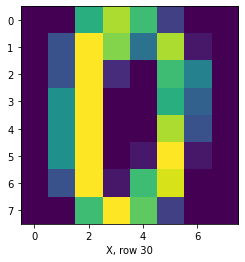

In [ ]:
S = X[30]
S = S.reshape(8,8)
plt.imshow(S, cmap=None)
plt.xlabel('X, row 30')

<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> Use principal component analysis (from sklearn.decomposition import PCA) to reduce the dimensionality of the problem to 2 dimensions, and then visualize the data (using plt.scatter).  How does the plot change when we replace `Xn=X` to `Xn=X+np.random.normal(0,5,X.shape)`?  You can also try to increase the standard deviation of the noise.

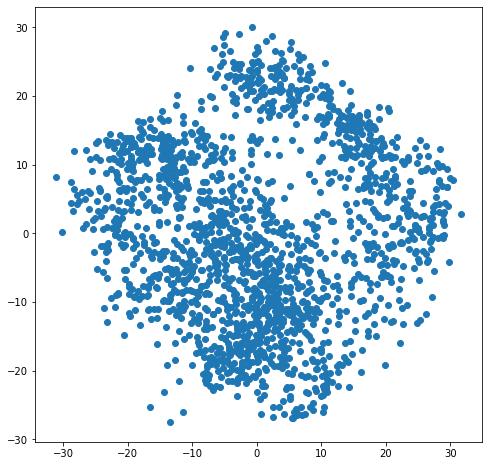

In [ ]:
from sklearn.decomposition import PCA
Xn=X
pca_Xn = PCA(n_components=2)
pc_Xn = pca_Xn.fit_transform(Xn)
fig = plt.figure(figsize=(8,8))
plt.scatter(pc_Xn[:,0],pc_Xn[:,1])
plt.show()

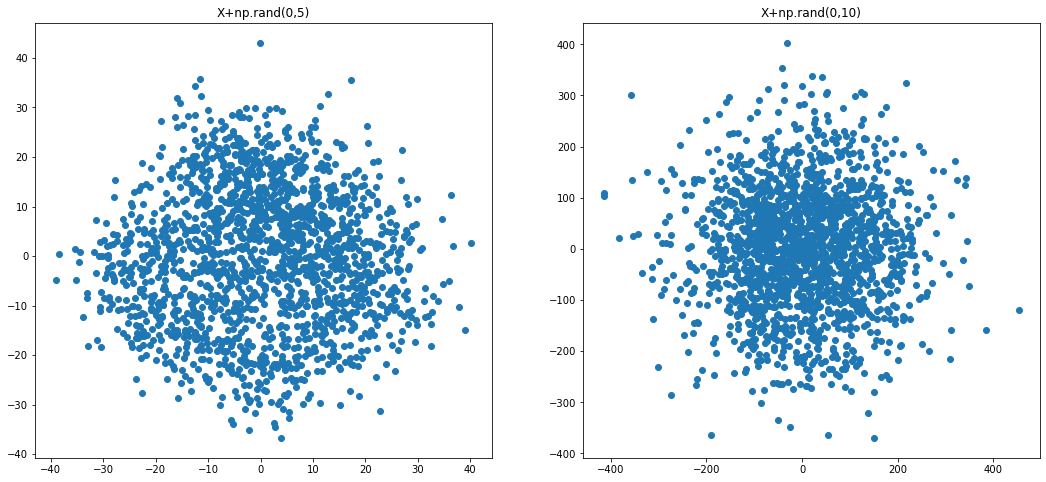

In [ ]:
Xn1 = X+np.random.normal(0,5,X.shape)
Xn2 = X+np.random.normal(0,100,X.shape)

pca_Xn1 = PCA(n_components=2)
pca_Xn2 = PCA(n_components=2)

pc_Xn1 = pca_Xn1.fit_transform(Xn1)
pc_Xn2 = pca_Xn2.fit_transform(Xn2)

fig = plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)
plt.scatter(pc_Xn1[:,0],pc_Xn1[:,1])
plt.title('X+np.rand(0,5)')
plt.subplot(1, 2, 2)
plt.scatter(pc_Xn2[:,0],pc_Xn2[:,1])
plt.title('X+np.rand(0,10)')
plt.show()

The noise in Xn1 has caused the scatter plot after PCA to be slightly more spread out than the scatter plot for X, considering the x-axis. But overall reduction in dimensionality is still visible.

<hr>
<span style="color:rgb(170,0,0)">**Task:**</span> Your task is to train a k-NN classifier using scikit-learn (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) on the DIGITS dataset loaded above.

Compare the accuracy (a) on the original data, (b) when adding noise to our data as above

Use 10 neighbours and the euclidean distance function. 20% of the data should be used for training.

Use scikit-learn **only** for k-NN, while using numpy functions for the rest of the code

#### Original Data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

model = KNeighborsClassifier(n_neighbors=10)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.8,shuffle=False)

model.fit(X_train,y_train)

X_Test=[]
for i in range(len(X_test)):
    X_Test.append(list(X_test[i]))
    
predicted=model.predict(X_Test)
score = accuracy_score(predicted,y_test)
score

0.8956884561891516

#### With Noise

In [ ]:
model = KNeighborsClassifier(n_neighbors=10)
X_train, X_test, y_train, y_test=train_test_split(Xn1,y,test_size=0.8,shuffle=False)

model.fit(X_train,y_train)

X_Test=[]
for i in range(len(X_test)):
    X_Test.append(list(X_test[i]))
    
predicted=model.predict(X_Test)
score = accuracy_score(predicted,y_test)
score

0.7253129346314325

Comparing the accuracy, the orignal data predicts more accurate result than the noisy data.